In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#Loading the Dataset
data = pd.read_csv('redditData.csv')
print(data.head())

                                               Title  \
0                                     Portfolio Talk   
1  If you had to start again today and could only...   
2                                     Shorting Tesla   
3             Nordstrom’s chances of going private?    
4                Best strategy for investing in SPY:   

                                                Text  Score  Comments  \
0  Hello all, after months of my own research I'v...      3         0   
1  If you had to start again today and could only...      4        18   
2  Tesla went up almost 50% after Trump won elect...     16       184   
3  The family wants to take it private for $23/sh...      8         5   
4  I decided to explore this by testing three dif...     20        38   

        Created  
0  1.733682e+09  
1  1.733682e+09  
2  1.733670e+09  
3  1.733653e+09  
4  1.733627e+09  


In [5]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):

    if not isinstance(text, str):
        return ""
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    #removing hashtags
    text = re.sub(r'@\w+|#\w+|[^A-Za-z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

data['cleaned_text'] = data['Text'].apply(clean_text)
data.dropna(subset=['cleaned_text'], inplace=True)
data.to_csv('cleaned_data.csv', index=False)
print('cleaned_data.csv')


cleaned_data.csv


In [7]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

data['sentiment'] = data['cleaned_text'].apply(get_sentiment)


print(data[['cleaned_text', 'sentiment']].head())


                                        cleaned_text  sentiment
0  hello month research ive made portolio want pr...   0.121166
1  start today could choose five stock set rest l...   0.154167
2  tesla went almost trump election although frie...   0.132407
3  family want take private share kohl macys stil...   0.056250
4  decided explore testing three different strate...   0.160417


In [9]:
keywords = ['stock', 'market', 'bull', 'bear', 'profit', 'loss', 'investment']


def count_keywords(text):
    tokens = word_tokenize(text)
    return sum(1 for word in tokens if word in keywords)


data['keyword_count'] = data['cleaned_text'].apply(count_keywords)

data['word_count'] = data['cleaned_text'].apply(lambda x: len(word_tokenize(x)))

print(data[['cleaned_text', 'word_count']].head())


                                        cleaned_text  word_count
0  hello month research ive made portolio want pr...         298
1  start today could choose five stock set rest l...          39
2  tesla went almost trump election although frie...          65
3  family want take private share kohl macys stil...          46
4  decided explore testing three different strate...         170


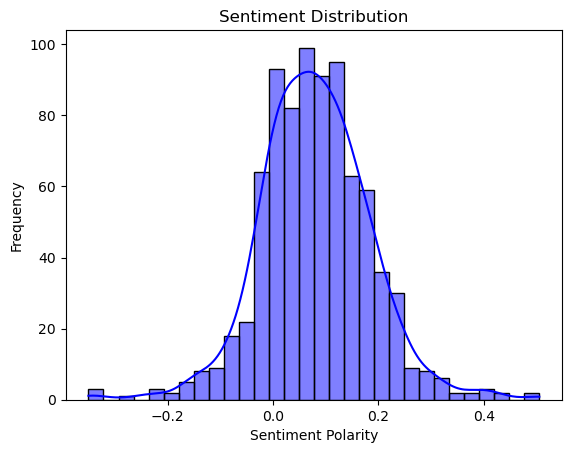

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
sns.histplot(data['sentiment'], bins=30, kde=True, color='blue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


               sentiment  keyword_count  word_count  sentiment
sentiment       1.000000       0.000067   -0.009529   1.000000
keyword_count   0.000067       1.000000    0.462429   0.000067
word_count     -0.009529       0.462429    1.000000  -0.009529
sentiment       1.000000       0.000067   -0.009529   1.000000


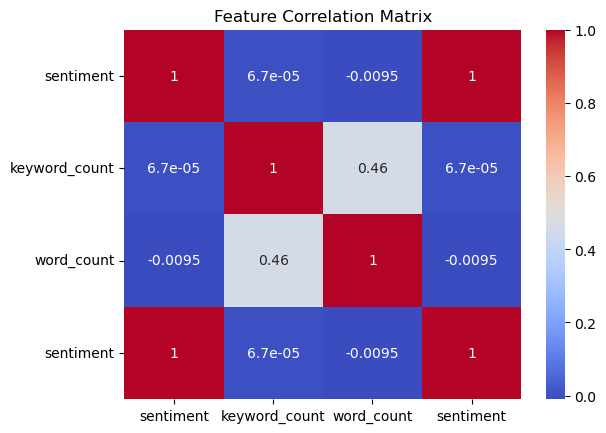

In [15]:
# Correlation matrix
correlation_matrix = data[['sentiment', 'keyword_count', 'word_count', 'sentiment']].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [19]:
data.to_csv('sentiment_data.csv', index=False)
print("Processed data saved to 'sentiment_data.csv'")


Processed data saved to 'sentiment_data.csv'
